In [76]:
import csv, codecs, json, psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_json("data.json")
df

,id,first_name,last_name,gender,username,email,university,language
0,1,Paolina,Hackey,Female,phackey0,phackey0@shop-pro.jp,Baltimore Hebrew University,Filipino
1,2,Crawford,Gilardone,Male,cgilardone1,cgilardone1@shareasale.com,National Metallurgical Academy of Ukraine,Latvian
2,3,Aron,Carrier,Male,acarrier2,acarrier2@dailymotion.com,International University for Science & Technol...,Malayalam
3,4,Frieda,Walkinshaw,Female,fwalkinshaw3,fwalkinshaw3@netlog.com,Nakhchivan Private University,Latvian
4,5,Marnia,Cleary,Non-binary,mcleary4,mcleary4@forbes.com,MGH Institute of Health Professions,Mongolian
...,...,...,...,...,...,...,...,...
995,996,Jewel,Dunne,Female,jdunnern,jdunnern@webnode.com,Michigan State University,Chinese
996,997,Sara-ann,Yorath,Genderqueer,syorathro,syorathro@spiegel.de,"Physical Education Academy ""Jozef Pilsudski"" i...",Filipino
997,998,Annabela,Dronsfield,Female,adronsfieldrp,adronsfieldrp@slideshare.net,Bharathiar University,Tetum
998,999,Conny,Trengrove,Female,ctrengroverq,ctrengroverq@smugmug.com,Technical University of Warsaw,Guaraní


In [5]:
df.fillna(0)
df.to_csv(path_or_buf="json2csv.csv", encoding="utf-8", index=False)

In [6]:
file = "json2csv.csv";
df = pd.read_csv(file)
df

,id,first_name,last_name,gender,username,email,university,language
0,1,Paolina,Hackey,Female,phackey0,phackey0@shop-pro.jp,Baltimore Hebrew University,Filipino
1,2,Crawford,Gilardone,Male,cgilardone1,cgilardone1@shareasale.com,National Metallurgical Academy of Ukraine,Latvian
2,3,Aron,Carrier,Male,acarrier2,acarrier2@dailymotion.com,International University for Science & Technol...,Malayalam
3,4,Frieda,Walkinshaw,Female,fwalkinshaw3,fwalkinshaw3@netlog.com,Nakhchivan Private University,Latvian
4,5,Marnia,Cleary,Non-binary,mcleary4,mcleary4@forbes.com,MGH Institute of Health Professions,Mongolian
...,...,...,...,...,...,...,...,...
995,996,Jewel,Dunne,Female,jdunnern,jdunnern@webnode.com,Michigan State University,Chinese
996,997,Sara-ann,Yorath,Genderqueer,syorathro,syorathro@spiegel.de,"Physical Education Academy ""Jozef Pilsudski"" i...",Filipino
997,998,Annabela,Dronsfield,Female,adronsfieldrp,adronsfieldrp@slideshare.net,Bharathiar University,Tetum
998,999,Conny,Trengrove,Female,ctrengroverq,ctrengroverq@smugmug.com,Technical University of Warsaw,Guaraní


In [7]:
# adjust table name
file_name = file.split(".")[0]
table_name = file_name.lower().replace("2", "_")
table_name

'json_csv'

In [8]:
df.columns

Index(['id', 'first_name', 'last_name', 'gender', 'username', 'email',
       'university', 'language'],
      dtype='object')

In [20]:
conn = cur = None
conn = psycopg2.connect(
    host="localhost", 
    dbname="csv_db", 
    user="postgres", 
    password="namvt16052004", 
    port=5432
)
cur = conn.cursor()
if (conn and cur):
    print("Connect successfully!")

Connect successfully!


In [21]:
# create table student_information
# (
#     id                int,
#     first_name        varchar,
#     last_name         varchar,
#     gender            varchar,
#     username          varchar,
#     email             varchar,
#     university        varchar,
#     language          varchar
# );

In [22]:
df.dtypes

id             int64
first_name    object
last_name     object
gender        object
username      object
email         object
university    object
language      object
dtype: object

In [23]:
replacements = {
    "object": "varchar",
    "int64": "int",
    "float64": "float",
    "datetime64": "timestamp",
    "timedelta64[ns]": "varchar"
}

replacements

{'object': 'varchar',
 'int64': 'int',
 'float64': 'float',
 'datetime64': 'timestamp',
 'timedelta64[ns]': 'varchar'}

In [24]:
col_str = ", ".join("{} {}".format(n, d) for (n, d) in zip(df.columns, df.dtypes.replace(replacements)))
col_str

'id int, first_name varchar, last_name varchar, gender varchar, username varchar, email varchar, university varchar, language varchar'

In [25]:
# drop table if exists
command = f"drop table if exists {table_name}"
cur.execute(command)

In [26]:
# create tables
command = f"create table {table_name} (id int, first_name varchar, last_name varchar, gender varchar, username varchar, email varchar, university varchar, language varchar)"
cur.execute(command)

In [27]:
# new csv
df.to_csv((table_name + ".csv"), header=df.columns, index=False, encoding="utf-8")
df

,id,first_name,last_name,gender,username,email,university,language
0,1,Paolina,Hackey,Female,phackey0,phackey0@shop-pro.jp,Baltimore Hebrew University,Filipino
1,2,Crawford,Gilardone,Male,cgilardone1,cgilardone1@shareasale.com,National Metallurgical Academy of Ukraine,Latvian
2,3,Aron,Carrier,Male,acarrier2,acarrier2@dailymotion.com,International University for Science & Technol...,Malayalam
3,4,Frieda,Walkinshaw,Female,fwalkinshaw3,fwalkinshaw3@netlog.com,Nakhchivan Private University,Latvian
4,5,Marnia,Cleary,Non-binary,mcleary4,mcleary4@forbes.com,MGH Institute of Health Professions,Mongolian
...,...,...,...,...,...,...,...,...
995,996,Jewel,Dunne,Female,jdunnern,jdunnern@webnode.com,Michigan State University,Chinese
996,997,Sara-ann,Yorath,Genderqueer,syorathro,syorathro@spiegel.de,"Physical Education Academy ""Jozef Pilsudski"" i...",Filipino
997,998,Annabela,Dronsfield,Female,adronsfieldrp,adronsfieldrp@slideshare.net,Bharathiar University,Tetum
998,999,Conny,Trengrove,Female,ctrengroverq,ctrengroverq@smugmug.com,Technical University of Warsaw,Guaraní


In [28]:
# open csv file
myFile = open(table_name + ".csv")
if (myFile):
    print("Open successfully")

Open successfully


In [29]:
# insert
command = f"COPY {table_name} FROM STDIN WITH CSV HEADER DELIMITER AS ','"
cur.copy_expert(sql=command, file=myFile)

In [30]:
# change mode
command = f"grant select on table {table_name} to public"

In [31]:
# close
conn.commit()
if cur is not None:
    cur.close()
if conn is not None:
    conn.close() 

In [108]:
cnt = df["gender"].value_counts()
cnt = cnt.to_dict()
cnt

{'Female': 452,
 'Male': 439,
 'Genderqueer': 25,
 'Agender': 21,
 'Bigender': 19,
 'Polygender': 17,
 'Non-binary': 14,
 'Genderfluid': 13}

In [109]:
array = []
sex = []
for x in cnt:
    sex.append(x)
    array.append(cnt[x])
print(sex)
print(array)

['Female', 'Male', 'Genderqueer', 'Agender', 'Bigender', 'Polygender', 'Non-binary', 'Genderfluid']
[452, 439, 25, 21, 19, 17, 14, 13]


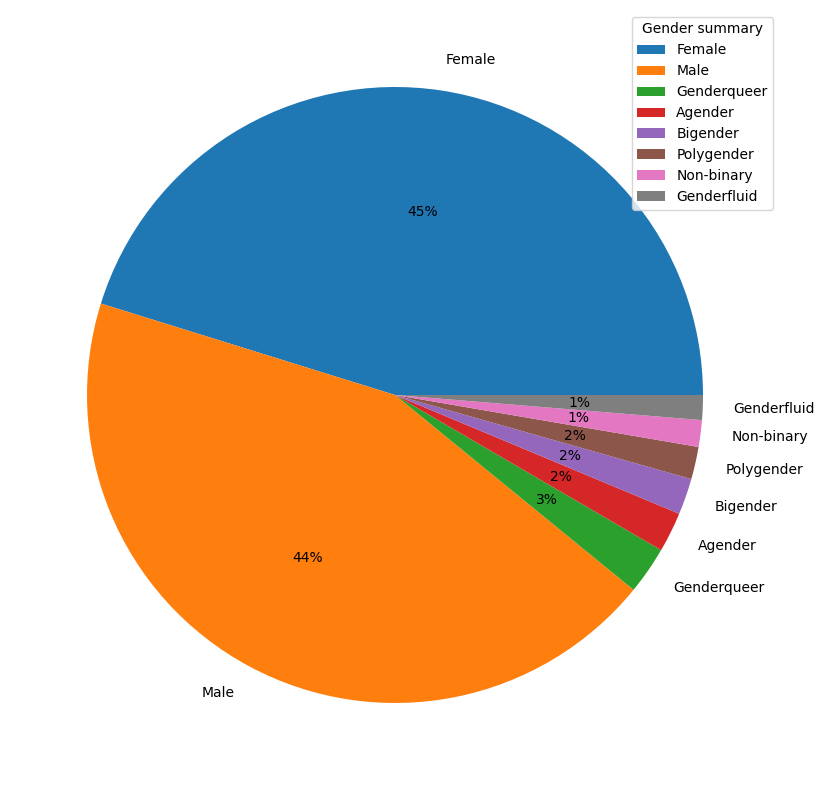

<Figure size 640x480 with 0 Axes>

In [110]:
y = np.array(array)
plt.figure(figsize=(10,10))
plt.pie(y, labels = sex, autopct='%1.0f%%')
plt.legend(title = "Gender summary")
plt.show() 

In [111]:
cnt = df["language"].value_counts()
cnt = cnt.to_dict()
cnt

{'Dari': 19,
 'Tetum': 18,
 'Japanese': 16,
 'Tok Pisin': 16,
 'Telugu': 16,
 'Czech': 16,
 'Icelandic': 16,
 'Assamese': 15,
 'Polish': 15,
 'French': 15,
 'Sotho': 15,
 'Greek': 15,
 'Finnish': 14,
 'Estonian': 13,
 'Catalan': 13,
 'Yiddish': 13,
 'Swati': 13,
 'Malay': 13,
 'Quechua': 13,
 'Korean': 13,
 'Lao': 13,
 'Guaraní': 13,
 'Hiri Motu': 13,
 'Romanian': 13,
 'German': 12,
 'Gujarati': 12,
 'Hebrew': 12,
 'Chinese': 12,
 'Kyrgyz': 12,
 'Marathi': 12,
 'Macedonian': 12,
 'Gagauz': 12,
 'Kazakh': 12,
 'English': 12,
 'Swahili': 12,
 'New Zealand Sign Language': 12,
 'Azeri': 11,
 'Bulgarian': 11,
 'Tswana': 11,
 'Oriya': 11,
 'Nepali': 11,
 'Moldovan': 11,
 'Mongolian': 11,
 'Kannada': 11,
 'Malayalam': 11,
 'Dhivehi': 10,
 'Persian': 10,
 'Afrikaans': 10,
 'Dutch': 10,
 'Irish Gaelic': 10,
 'Latvian': 10,
 'Swedish': 10,
 'Tsonga': 10,
 'Italian': 10,
 'Maltese': 10,
 'Armenian': 9,
 'Somali': 9,
 'Belarusian': 9,
 'Lithuanian': 9,
 'Filipino': 9,
 'Papiamento': 9,
 'Ndebele':

In [112]:
array = []
language = []
for x in cnt:
    language.append(x)
    array.append(cnt[x])
print(language)
print(array)

['Dari', 'Tetum', 'Japanese', 'Tok Pisin', 'Telugu', 'Czech', 'Icelandic', 'Assamese', 'Polish', 'French', 'Sotho', 'Greek', 'Finnish', 'Estonian', 'Catalan', 'Yiddish', 'Swati', 'Malay', 'Quechua', 'Korean', 'Lao', 'Guaraní', 'Hiri Motu', 'Romanian', 'German', 'Gujarati', 'Hebrew', 'Chinese', 'Kyrgyz', 'Marathi', 'Macedonian', 'Gagauz', 'Kazakh', 'English', 'Swahili', 'New Zealand Sign Language', 'Azeri', 'Bulgarian', 'Tswana', 'Oriya', 'Nepali', 'Moldovan', 'Mongolian', 'Kannada', 'Malayalam', 'Dhivehi', 'Persian', 'Afrikaans', 'Dutch', 'Irish Gaelic', 'Latvian', 'Swedish', 'Tsonga', 'Italian', 'Maltese', 'Armenian', 'Somali', 'Belarusian', 'Lithuanian', 'Filipino', 'Papiamento', 'Ndebele', 'Montenegrin', 'Hindi', 'Portuguese', 'Zulu', 'Bosnian', 'Tamil', 'Thai', 'Arabic', 'Dzongkha', 'Khmer', 'Spanish', 'Norwegian', 'Fijian', 'Amharic', 'Tajik', 'Malagasy', 'Albanian', 'Bengali', 'Punjabi', 'Bislama', 'Kashmiri', 'Luxembourgish', 'West Frisian', 'Indonesian', 'Georgian', 'Hungarian'

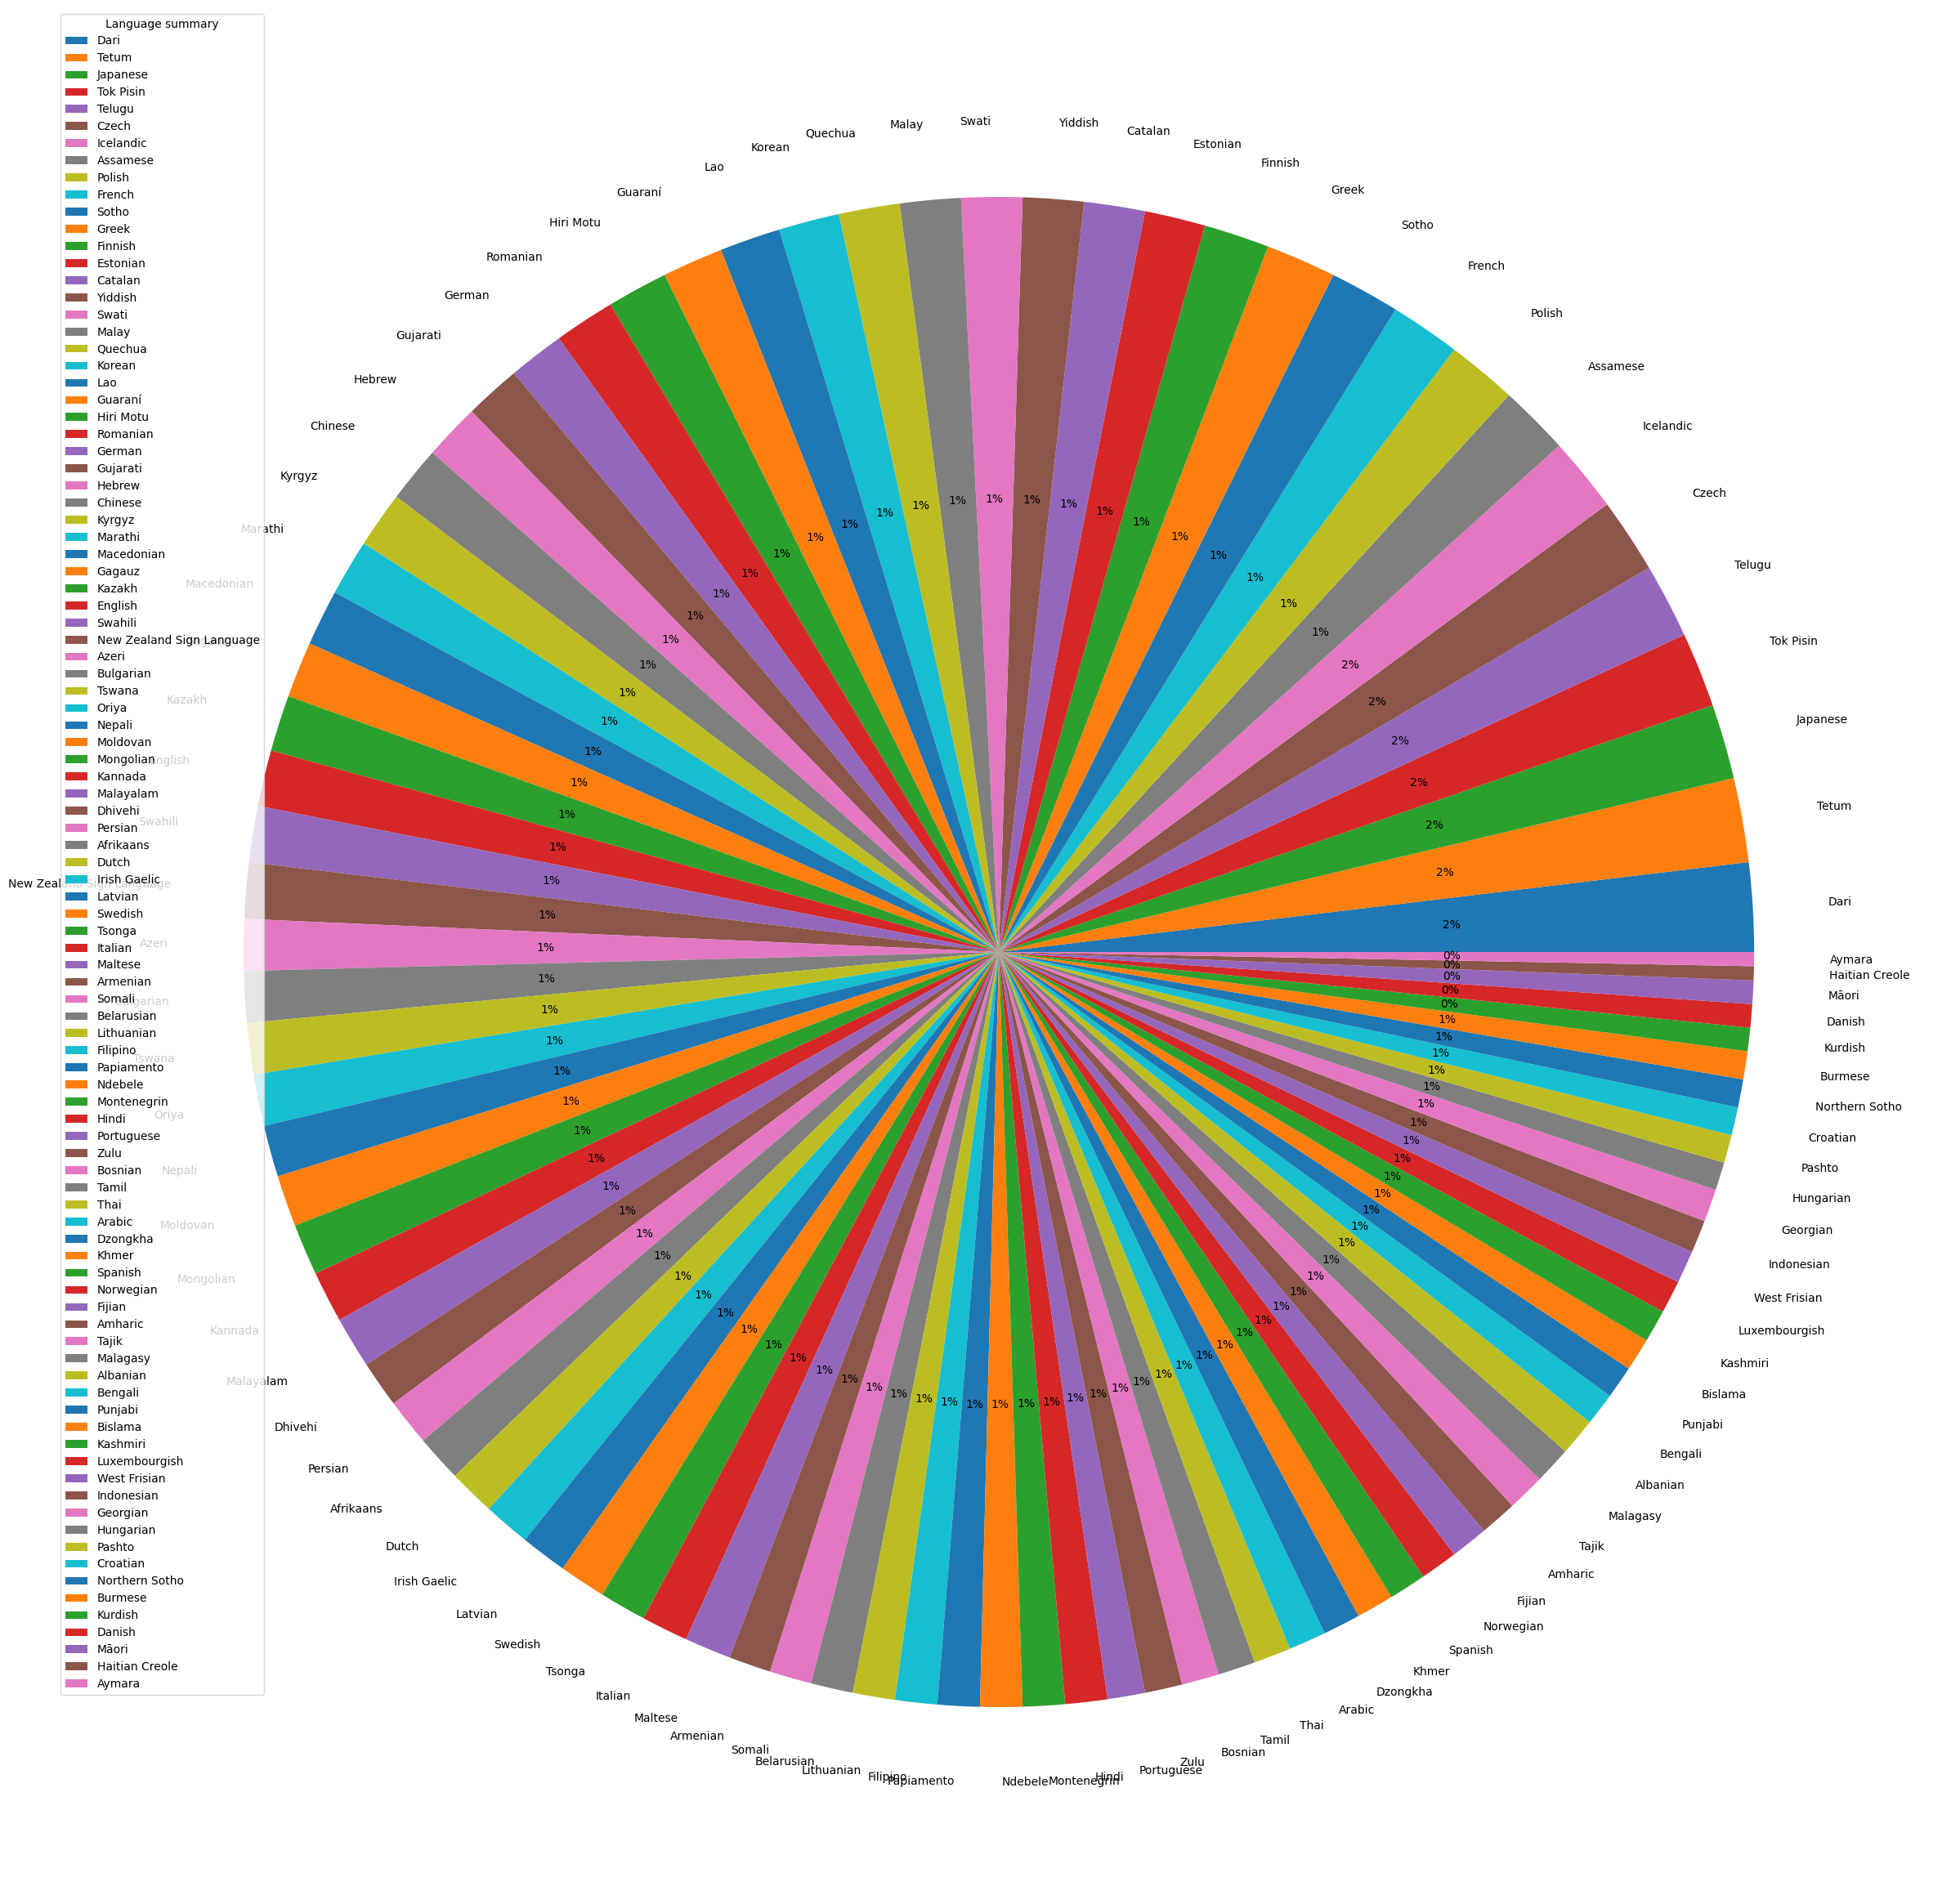

<Figure size 640x480 with 0 Axes>

In [113]:
y = np.array(array)
plt.figure(figsize=(30, 30))
plt.pie(y, labels = language, autopct='%1.0f%%')
plt.legend(title = "Language summary")
plt.show() 